# **Petunjuk TTS**

Silakan simpan file ke dalam bentuk **TTS_NIM.ipynb**. Tuliskan koding untuk dapat menampilkan hasil seperti yang diminta. Setelah selesai mengerjakan, silakan unggah ke GClass. Jangan sampai terlambat ya...keterlambatan mengakibatkan pengurangan nilai TTS.

Have fun!

### **1. Import Libraries**

In [172]:
# Silakan import librari yang kalian butuhkan (pandas, numpy, matplotlib, seaborn, dan missingno)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msn


In [173]:
# Ambil dataset dari (https://github.com/adelnehme/python-for-spreadsheet-users-webinar/blob/master/datasets/airhttps://github.com/adelnehme/python-for-spreadsheet-users-webinar/blob/master/datasets/airbnb.csv?raw=truebnb.csv?raw=true) dan simpan dengan nama variabel data
data = pd.read_csv('airbnb.csv',index_col="Unnamed: 0")

In [174]:
# Lihat 5 data teratas pada DataFrame "data"
data.head()

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23


In [175]:
# Cek tipe data dalam "data"
data.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
dtype: object

### **2. Membersihkan Data**

**Challenge 1**: Ganti `coordinates` dengan kolom `latitude` dan `longitude`

In [176]:
# Hapus tanda "(" dan ")" dari kolom coordinates
data['coordinates'] = data['coordinates'].str.replace("(","")
data['coordinates'] = data['coordinates'].str.replace(")","")

C:\Users\Windows10\AppData\Local\Temp\ipykernel_14464\2943789285.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['coordinates'] = data['coordinates'].str.replace("(","")
C:\Users\Windows10\AppData\Local\Temp\ipykernel_14464\2943789285.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['coordinates'] = data['coordinates'].str.replace(")","")


In [177]:
# Cetak 5 data paling atas dari kolom coordinates
data['coordinates'].head()

0    40.63222, -73.93398
1    40.78761, -73.96862
2     40.7007, -73.99517
3    40.79169, -73.97498
4    40.71884, -73.98354
Name: coordinates, dtype: object

In [178]:
# Lakukan split data di kolom coordinates, beri nama lat_long
lat_long =  data['coordinates'].str.split(", ",expand=True)

In [179]:
# Buat supaya latitude berisi nilai lat_long[0] dan longitude berisi nilai lat_long[1]
data['latitude'] = lat_long[0]
data['longitude'] = lat_long[1]

In [180]:
# Cetak data
data['latitude']

0        40.63222
1        40.78761
2         40.7007
3        40.79169
4        40.71884
           ...   
10014    40.80379
10015    40.79531
10016    40.68266
10017    40.68832
10018    40.76174
Name: latitude, Length: 10019, dtype: object

In [181]:
# Konversi nilai latitude dan longitude menjadi FLOAT
data['latitude'] = data['latitude'].astype(float)
data['longitude'] = data['longitude'].astype(float)

In [182]:
# Cek tipe data sekali lagi
data.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude              float64
longitude             float64
dtype: object

In [183]:
# Hapus kolom coordinates
data.drop('coordinates', inplace=True, axis=1)

In [184]:
# Cetak data sekali lagi
data.head()

,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.70070,-73.99517
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354


**Challenge 2**: Hapus `$` dari kolom `price` dan konversi ke `float`

In [185]:
# Hapus tanda dolar ($) dari kolom price sebelum nantinya akan kita konversi ke tipe data FLOAT
data['price'] = data['price'].str.replace("$","")

C:\Users\Windows10\AppData\Local\Temp\ipykernel_14464\3901439326.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['price'] = data['price'].str.replace("$","")


In [186]:
# Cetak untuk melihat apakah sudah terjadi perubahan pada kolom price
data['price']

0         45
1        135
2        150
3         86
4        160
        ... 
10014    105
10015    125
10016    100
10017    450
10018     90
Name: price, Length: 10019, dtype: object

In [187]:
# Konversi kolom price ke bentuk FLOAT
data['price'] = data['price'].astype(float)

In [188]:
# Hitung nilai mean dari kolom price setelah dikonversi
meanPrice = data['price'].mean()
meanPrice

150.90512217564665

C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


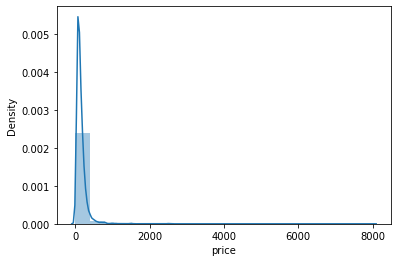

In [189]:
# Buat visualisasi distribusi dari kolom prices
sns.distplot(data['price'], bins=20)
plt.show()

**Challenge 3**: Kita buat supaya kolom `room_type` benar-benar rapi secara kategori.

In [190]:
# Cetak supaya tahu kategori apa saja yang ada di kolom `room_type`
# listCategory = np.array(pd.Categorical(data['room_type']).categories)
# listCategory

data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)

In [191]:
# Buat supaya semua berubah menjadi huruf kecil
data['room_type'] = data['room_type'].str.lower()
data['room_type'].unique()

array(['private room', 'entire home/apt', 'private', 'shared room',
       'home', '   shared room      '], dtype=object)

In [192]:
# Buat supaya tidak ada spasi di awal dan akhir
data['room_type'] = data['room_type'].str.strip(" ")
data['room_type'].unique()

array(['private room', 'entire home/apt', 'private', 'shared room',
       'home'], dtype=object)

In [193]:
# Ganti menjadi kategori 'Shared room', 'Entire place', 'Private room' dan 'Hotel room'
mapping = {
    'private room' : 'Private Room',
    'entire home/apt' : 'Entire Place',
    'shared room' : 'Shared Room',
    'home': 'Hotel Room',
    'private' : 'Private Room',
}

for key in mapping.keys():
    data['room_type'] = data['room_type'].str.replace(key, mapping[key])


In [194]:
# Cek 5 data teratas untuk melihat perubahan yang terjadi
data.head()

,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",Private Room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",Entire Place,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",Entire Place,150.0,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.70070,-73.99517
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",Entire Place,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private Room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354


**Challenge 4**: Kita bersihkan **missing data**

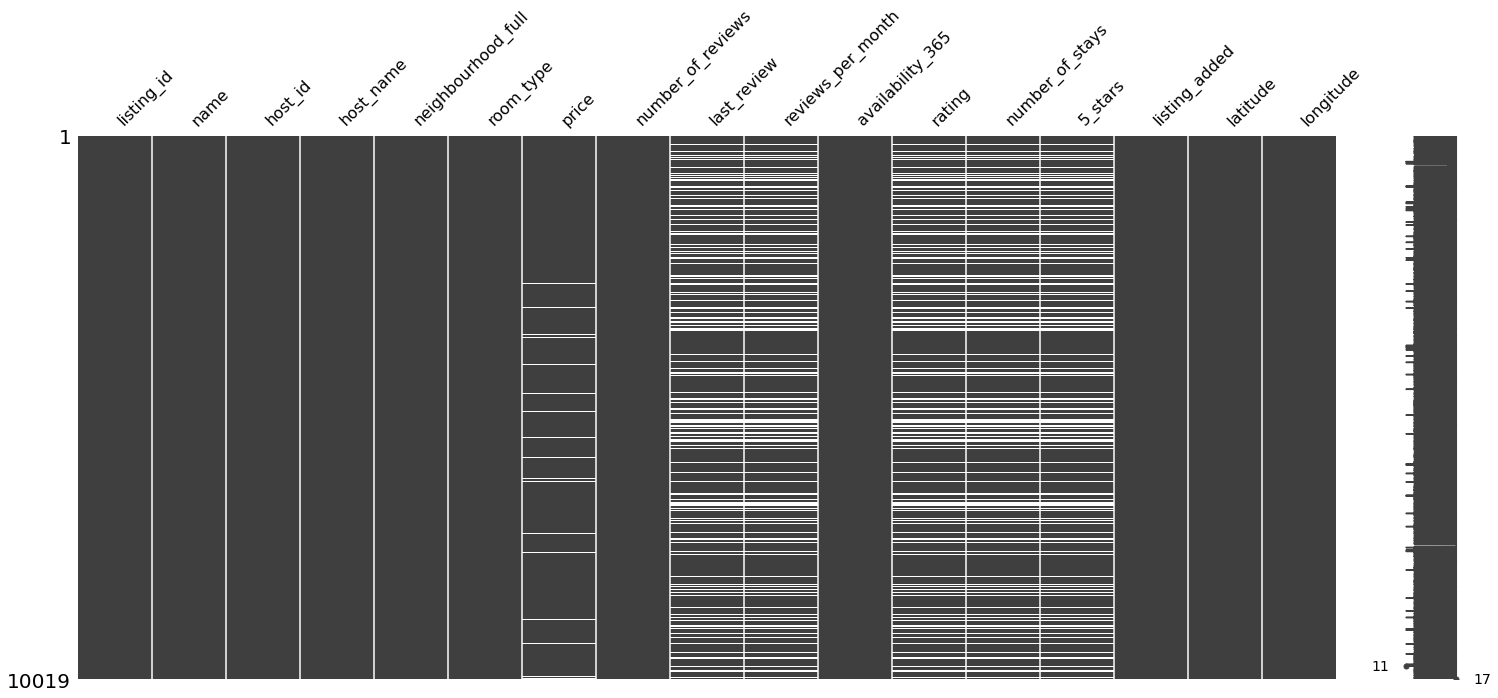

In [195]:
# Visualisasi missingness 
msn.matrix(data)
plt.show()

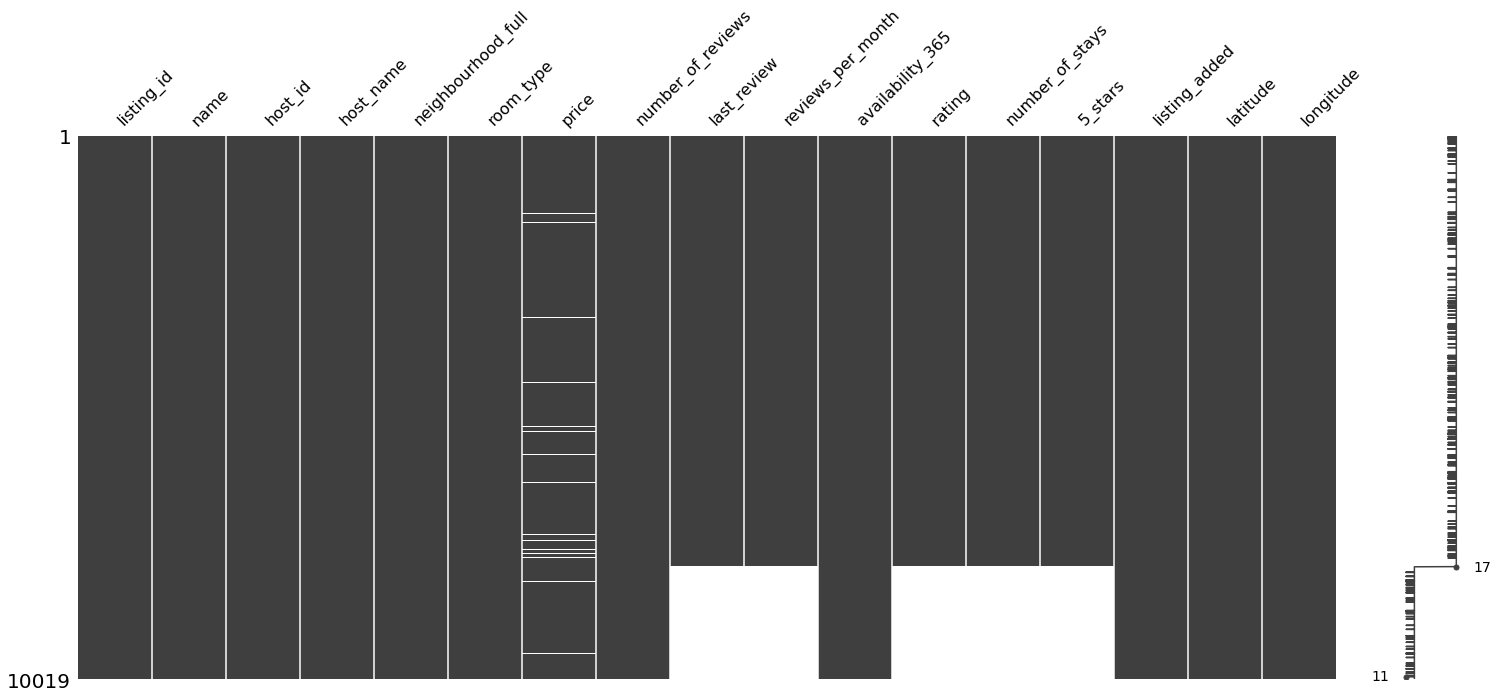

In [196]:
# Visualisasikan missingness berdasarkan rating
msn.matrix(data.sort_values(by="rating"))
plt.show()

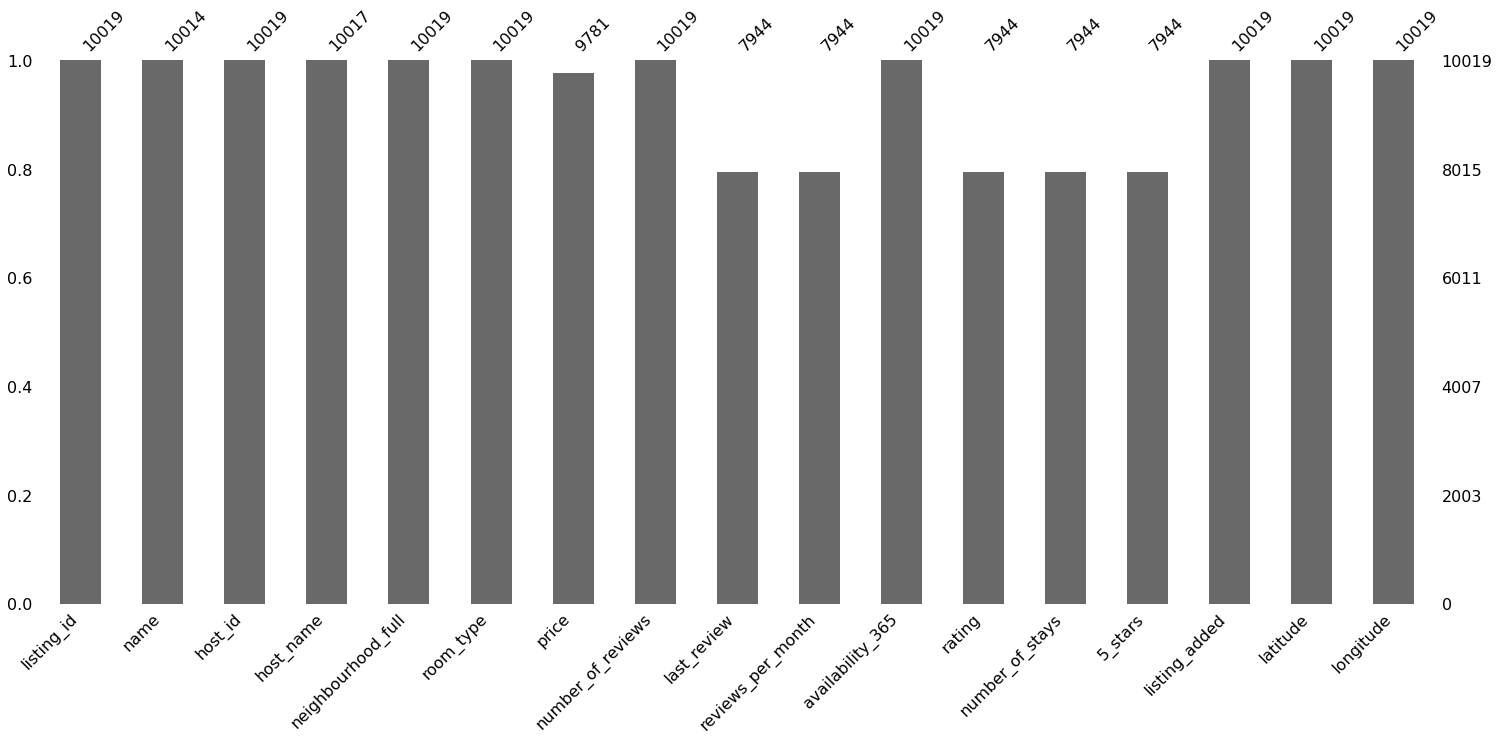

In [197]:
# Buat dalam bentuk barplot
msn.bar(data)
plt.show()

In [198]:
# Cek DataFrame yang ada missing values di kolom rating, number_of_stays, 5_stars, reviews_per_month
data[data['rating'].isna()].describe()

,listing_id,host_id,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars,latitude,longitude
count,2.075000e+03,2.075000e+03,2028.000000,2075.0,0.0,2075.000000,0.0,0.0,0.0,2075.000000,2075.000000
mean,2.274238e+07,8.022455e+07,191.553748,0.0,NaN,104.531566,NaN,NaN,NaN,40.732074,-73.956771
std,1.123730e+07,8.663163e+07,316.186639,0.0,NaN,138.266525,NaN,NaN,NaN,0.051168,0.041065
min,6.358800e+04,1.475100e+04,0.000000,0.0,NaN,0.000000,NaN,NaN,NaN,40.527000,-74.209410
25%,1.232923e+07,1.224305e+07,70.000000,0.0,NaN,0.000000,NaN,NaN,NaN,40.697845,-73.985185
50%,2.345182e+07,4.040116e+07,120.000000,0.0,NaN,7.000000,NaN,NaN,NaN,40.727790,-73.960940
75%,3.400364e+07,1.333498e+08,205.250000,0.0,NaN,211.000000,NaN,NaN,NaN,40.763480,-73.939540
max,3.648724e+07,2.741034e+08,5250.000000,0.0,NaN,365.000000,NaN,NaN,NaN,40.911690,-73.727310


In [199]:
# Lakukan imputasi untuk missing data
data = data.fillna({
    'review_per_month':0,
    'number_of_stays':0,
    '5_stars':0
})

In [200]:
# Buat kolom baru, beri nama sudah_dinilai
sudah = np.where(data['rating'].isna() == True, 0,1)
data['sudah_dinilai'] = sudah

In [201]:
# Cek data
data.head()

,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,sudah_dinilai
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",Private Room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398,1
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",Entire Place,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862,1
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",Entire Place,150.0,0,NaN,NaN,65,NaN,0.0,0.000000,2018-08-15,40.70070,-73.99517,0
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",Entire Place,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498,1
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private Room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354,1


**Challenge 5**: Hapus kolom-kolom berikut


1.   neighbourhood_full
2.   number_of_reviews
3.   last_review
4.   reviews_per_month
5.   availability_365
6.   number_of_stays
7.   5_stars
8.   listing_added









In [202]:
# Hapus beberapa kolom yang tidak dibutuhkan
deleteColumns = {
    'neighbourhood_full',
    'number_of_reviews',
    'last_review',
    'reviews_per_month',
    'availability_365',
    'number_of_stays',
    '5_stars',
    'listing_added'
}
data.drop(deleteColumns, inplace=True, axis=1)


In [203]:
# Tampilkan data
data.head()

,listing_id,name,host_id,host_name,room_type,price,rating,latitude,longitude,sudah_dinilai
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,Private Room,45.0,4.100954,40.63222,-73.93398,1
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,Entire Place,135.0,3.367600,40.78761,-73.96862,1
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,Entire Place,150.0,NaN,40.70070,-73.99517,0
3,6425850,"Spacious, charming studio",32715865,Yelena,Entire Place,86.0,4.763203,40.79169,-73.97498,1
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,Private Room,160.0,3.822591,40.71884,-73.98354,1
